In [41]:
import tensorflow as tf

w = tf.Variable(2.)

def f(w):
  y = w**2
  z = 2*y + 5
  return z

In [42]:
with tf.GradientTape() as tape:
  z = f(w)

gradients = tape.gradient(z, [w])
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


In [43]:
# 학습될 가중치 변수를 선언
W = tf.Variable(4.0)
b = tf.Variable(1.0)

In [44]:
@tf.function
def hypothesis(x):
  return W*x + b


In [45]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())


[15. 21. 23. 25.]


In [46]:
@tf.function
def mse_loss(y_pred, y):
  # 두 개의 차이값을 제곱을 해서 평균을 취한다.
  return tf.reduce_mean(tf.square(y_pred - y))


In [47]:
X=[1,2,3,4,5,6,7,8,9] # 공부하는 시간
y=[11,22,33,44,53,66,77,87,95] # 각 공부하는 시간에 맵핑되는 성적


In [48]:
optimizer = tf.optimizers.SGD(0.01)


In [50]:
for i in range(301):
  with tf.GradientTape() as tape:
    # 현재 파라미터에 기반한 입력 x에 대한 예측값을 y_pred
    y_pred = hypothesis(X)
#     print("y_pred", y_pred)
    
    # 평균 제곱 오차를 계산
    cost = mse_loss(y_pred, y)
#     print("cost", cost)

  # 손실 함수에 대한 파라미터의 미분값 계산
  gradients = tape.gradient(cost, [W, b])

  # 파라미터 업데이트
  optimizer.apply_gradients(zip(gradients, [W, b]))

  if i % 10 == 0:
    print("epoch : {:3} | W의 값 : {:5.4f} | b의 값 : {:5.4} | cost : {:5.6f}".format(i, W.numpy(), b.numpy(), cost))

  


epoch :   0 | W의 값 : 8.2133 | b의 값 : 1.664 | cost : 1402.555542
epoch :  10 | W의 값 : 10.4971 | b의 값 : 1.977 | cost : 1.351182
epoch :  20 | W의 값 : 10.5047 | b의 값 :  1.93 | cost : 1.328165
epoch :  30 | W의 값 : 10.5119 | b의 값 : 1.884 | cost : 1.306967
epoch :  40 | W의 값 : 10.5188 | b의 값 : 1.841 | cost : 1.287436
epoch :  50 | W의 값 : 10.5254 | b의 값 : 1.799 | cost : 1.269459
epoch :  60 | W의 값 : 10.5318 | b의 값 : 1.759 | cost : 1.252898
epoch :  70 | W의 값 : 10.5379 | b의 값 : 1.721 | cost : 1.237644
epoch :  80 | W의 값 : 10.5438 | b의 값 : 1.684 | cost : 1.223598
epoch :  90 | W의 값 : 10.5494 | b의 값 : 1.648 | cost : 1.210658
epoch : 100 | W의 값 : 10.5548 | b의 값 : 1.614 | cost : 1.198740
epoch : 110 | W의 값 : 10.5600 | b의 값 : 1.582 | cost : 1.187767
epoch : 120 | W의 값 : 10.5650 | b의 값 :  1.55 | cost : 1.177665
epoch : 130 | W의 값 : 10.5697 | b의 값 :  1.52 | cost : 1.168354
epoch : 140 | W의 값 : 10.5743 | b의 값 : 1.492 | cost : 1.159782
epoch : 150 | W의 값 : 10.5787 | b의 값 : 1.464 | cost : 1.151890
epoch 

In [51]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[38.35479  54.295143 59.608593 64.92204 ]


In [11]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [12]:
X=[1,2,3,4,5,6,7,8,9] # 공부하는 시간
y=[11,22,33,44,53,66,77,87,95] # 각 공부하는 시간에 맵핑되는 성적

model = Sequential()

# 입력 x의 차원은 1, 출력 y의 차원도 1. 선형 회귀이므로 activation은 'linear'
model.add(Dense(1, input_dim=1, activation='linear'))

# sgd는 경사 하강법을 의미. 학습률(learning rate, lr)은 0.01.
sgd = optimizers.SGD(lr=0.01)

# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
model.compile(optimizer=sgd ,loss='mse',metrics=['mse'])

# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 300번 시도합니다.
model.fit(X,y, batch_size=1, epochs=300, shuffle=False)

/Users/formegusto/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/300
9/9 [==============================] - 0s 818us/step - loss: 285.4158 - mse: 285.4158
Epoch 2/300
9/9 [==============================] - 0s 660us/step - loss: 2.1127 - mse: 2.1127
Epoch 3/300
9/9 [==============================] - 0s 776us/step - loss: 2.1137 - mse: 2.1137
Epoch 4/300
9/9 [==============================] - 0s 758us/step - loss: 2.1147 - mse: 2.1147
Epoch 5/300
9/9 [==============================] - 0s 711us/step - loss: 2.1157 - mse: 2.1157
Epoch 6/300
9/9 [==============================] - 0s 848us/step - loss: 2.1167 - mse: 2.1167
Epoch 7/300
9/9 [==============================] - 0s 624us/step - loss: 2.1176 - mse: 2.1176
Epoch 8/300
9/9 [==============================] - 0s 905us/step - loss: 2.1185 - mse: 2.1185
Epoch 9/300
9/9 [==============================] - 0s 796us/step - loss: 2.1194 - mse: 2.1194
Epoch 10/300
9/9 [==============================] - 0s 615us/step - loss: 2.1203 - mse: 2.1203
Epoch 11/300
9/9 [==============================] - 0s 

9/9 [==============================] - 0s 634us/step - loss: 2.1440 - mse: 2.1440
Epoch 88/300
9/9 [==============================] - 0s 685us/step - loss: 2.1441 - mse: 2.1441
Epoch 89/300
9/9 [==============================] - 0s 624us/step - loss: 2.1441 - mse: 2.1441
Epoch 90/300
9/9 [==============================] - 0s 569us/step - loss: 2.1442 - mse: 2.1442
Epoch 91/300
9/9 [==============================] - 0s 617us/step - loss: 2.1443 - mse: 2.1443
Epoch 92/300
9/9 [==============================] - 0s 665us/step - loss: 2.1443 - mse: 2.1443
Epoch 93/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1444 - mse: 2.1444
Epoch 94/300
9/9 [==============================] - 0s 603us/step - loss: 2.1444 - mse: 2.1444
Epoch 95/300
9/9 [==============================] - 0s 539us/step - loss: 2.1445 - mse: 2.1445
Epoch 96/300
9/9 [==============================] - 0s 613us/step - loss: 2.1445 - mse: 2.1445
Epoch 97/300
9/9 [==============================] - 0s 631us/step

9/9 [==============================] - 0s 611us/step - loss: 2.1459 - mse: 2.1459
Epoch 173/300
9/9 [==============================] - 0s 627us/step - loss: 2.1459 - mse: 2.1459
Epoch 174/300
9/9 [==============================] - 0s 673us/step - loss: 2.1459 - mse: 2.1459
Epoch 175/300
9/9 [==============================] - 0s 600us/step - loss: 2.1459 - mse: 2.1459
Epoch 176/300
9/9 [==============================] - 0s 641us/step - loss: 2.1459 - mse: 2.1459
Epoch 177/300
9/9 [==============================] - 0s 631us/step - loss: 2.1459 - mse: 2.1459
Epoch 178/300
9/9 [==============================] - 0s 636us/step - loss: 2.1459 - mse: 2.1459
Epoch 179/300
9/9 [==============================] - 0s 641us/step - loss: 2.1459 - mse: 2.1459
Epoch 180/300
9/9 [==============================] - 0s 515us/step - loss: 2.1459 - mse: 2.1459
Epoch 181/300
9/9 [==============================] - 0s 582us/step - loss: 2.1459 - mse: 2.1459
Epoch 182/300
9/9 [==============================] - 0

9/9 [==============================] - 0s 697us/step - loss: 2.1460 - mse: 2.1460
Epoch 258/300
9/9 [==============================] - 0s 604us/step - loss: 2.1460 - mse: 2.1460
Epoch 259/300
9/9 [==============================] - 0s 671us/step - loss: 2.1460 - mse: 2.1460
Epoch 260/300
9/9 [==============================] - 0s 643us/step - loss: 2.1460 - mse: 2.1460
Epoch 261/300
9/9 [==============================] - 0s 717us/step - loss: 2.1460 - mse: 2.1460
Epoch 262/300
9/9 [==============================] - 0s 783us/step - loss: 2.1460 - mse: 2.1460
Epoch 263/300
9/9 [==============================] - 0s 833us/step - loss: 2.1460 - mse: 2.1460
Epoch 264/300
9/9 [==============================] - 0s 612us/step - loss: 2.1460 - mse: 2.1460
Epoch 265/300
9/9 [==============================] - 0s 696us/step - loss: 2.1460 - mse: 2.1460
Epoch 266/300
9/9 [==============================] - 0s 571us/step - loss: 2.1460 - mse: 2.1460
Epoch 267/300
9/9 [==============================] - 0

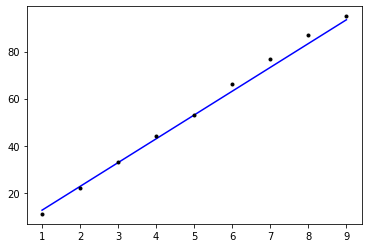

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X, model.predict(X), 'b', X,y, 'k.')

In [52]:
print(model.predict([9.5]))

[[98.556465]]
